
           This uses the "line intersecting a circle" algorithm
           from:

               Vince, John.  *Geometry for Computer Graphics: Formulae,
               Examples & Proofs.*  London: Springer-Verlag, 2005.

In [8]:
#!/home/klar/.venv/bin/python3
#-*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from numpy.linalg import norm, solve
import pickle as pkl
import matplotlib.pyplot as plt
import time
from conf import mesh_name, delta, ansatz, py_P, weights, SOLVE
from nlocal import Mesh#, assemble # Mesh class
from aux import filename
from plot import plot
from assemble import assemble
from scipy.interpolate import griddata

In [22]:
def plot(x_center, delta, TE, RD, fnm= "test"):
   
    pp = PdfPages(fnm + ".pdf")
    ax = plt.gca()
    plt.gca().set_aspect('equal')
    grid = np.arange(-1 - delta, 1 + delta, delta)
    plt.yticks(grid)
    plt.xticks(grid)
    #plt.grid(True, color='black', lw=0.1, alpha=.6)
    # Circle and Center
    plt.scatter(x_center[0], x_center[1], s=1, c="blue")
    circ = plt.Circle(x_center, delta, fill=False, color="b",lw=.1, alpha=.7)
    ax.add_artist(circ)

    if RD.size >0:
        plt.scatter(RD[:,0], RD[:,1], s=5)

    plt.scatter(TE[:,0], TE[:,1], s=3, c="red")
    plt.plot(TE[:,0], TE[:,1], color="red")
    
    plt.savefig(pp, format='pdf')
    plt.close()

    pp.close()


In [25]:
np.random.seed(1)
x_center = np.array([.3,.7])
#x_center = np.ones(2)
# Fetch some Triangle Close by
TE = np.array([[0,0],[0,1],[1,1]])
delta = .4
dist = lambda x,y: np.linalg.norm(x-y)

In [45]:
def directed_normal(orth, direction):
    v = np.ones(2)
    if orth[0]==0:
        v[1]=0
        v = v/np.linalg.norm(v)
        sign = np.sign(direction @ v)
        return v*sign
    else:
        v[0] = -orth[1]/orth[0]
        v = v/np.linalg.norm(v)
        sign = np.sign(direction @ v)
        return v*sign
x = np.random.rand(2)
v = directed_normal(x, np.ones(2))
print(x@v)

-5.551115123125783e-17


In [47]:
RD = []
on_edge = False
first_on_edge = 1

for k in range(3):
    edg0 = k
    edg1 = (k+1) % 3
    
    p = TE[edg0]
    q = TE[edg1]
    a = q - x_center
    b = p-q
    
    v = (a@b)**2 - (a@a - delta**2)*(b@b)
    #print(v)
    
    if (v>=0):
        term1 = -a@b/(b@b)
        term2 = np.sqrt(v) / (b@b)
        lam1 = term1 + term2
        lam2 = term1 - term2
        
        y1 = lam1*(p-q) + q
        y2 = lam2*(p-q) + q
        
        if dist(p, x_center) <= delta:
            RD.append(p)
            on_edge = False
        if 0 <= lam1 <= 1:
            first_on_edge *= len(RD)
            if on_edge:
                y0 = RD[-1]
                s = y0/2 + y1/2
                s_direction = directed_normal(y1-y0, p)
                #s_scaling = scale_toCircle(x_center, )
                RD.append(s+ s_direction*.1)
            RD.append(y1)
            on_edge = True
        if (0 <= lam2 <= 1) and (lam1 != lam2):
            first_on_edge *= len(RD)
            if on_edge:
                y0 = RD[-1]
                s = y0/2 + y2/2
                RD.append(s)
            RD.append(y2)
            on_edge = True
if on_edge and first_on_edge==0:
    s = RD[-1]/2+RD[0]/2
    RD.append(s)
#print(RD)
plot(x_center, delta, TE, np.array(RD), "Retriangulate")

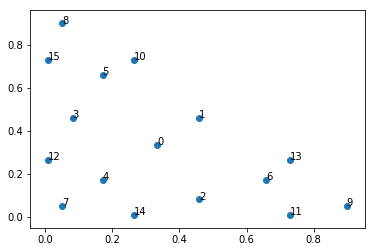

In [12]:
import matplotlib.pyplot as plt
plt.scatter(py_P[:,0], py_P[:,1])
for k in range(len(py_P)):
    plt.annotate(k, py_P[k])
plt.show()